In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

## Download test images and model weights

**Automatically**

To automatically download the dataset, run the cell below. You will need to install gdown if it is not already installed:
```
pip install gdown
```

**Manually**

The files can be downloaded with [Swiss Transfer](https://www.swisstransfer.com/d/40336cac-82c3-406a-ba73-7294a5b3837e) (valid until  04/02/2025) or [Google Drive](https://drive.google.com/file/d/19gkX-Yis8Jw56IjSH3P3KV9OUA-EO6K_/view?usp=sharing). The 2 model weight files and the image folder should be at the same level as this notebook.

In [ ]:
# Automatic download
import gdown
import zipfile

url = 'https://drive.google.com/file/d/19gkX-Yis8Jw56IjSH3P3KV9OUA-EO6K_/view?usp=sharing'
zip_path = 'handin_data.zip'
gdown.download(url, zip_path, quiet=False,fuzzy=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

Downloading...
From (original): https://drive.google.com/uc?id=19gkX-Yis8Jw56IjSH3P3KV9OUA-EO6K_
From (redirected): https://drive.google.com/uc?id=19gkX-Yis8Jw56IjSH3P3KV9OUA-EO6K_&confirm=t&uuid=e05efeea-840a-4df1-a1ad-61b5cb16d881
To: /home/houle/ipeo/Large-Rocks-Detection/rendu/handin_data.zip
100%|██████████| 332M/332M [00:03<00:00, 108MB/s]  


## Chose test images

In [3]:
imgs = ['2588_1133_3_2','2582_1127_2_2', '2583_1127_0_2']

## Run inference on both **detection** and **classification** models

In [4]:
model_class = YOLO("class.pt")
model_detect = YOLO("detect.pt")

results = []
for img in imgs:
    img_path = os.path.join('.','test', img + '.tif')
    img4b = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    img3b = cv2.imread(img_path)
    results.append([model_detect(img4b)[0], model_class(img3b)[0].probs])


0: 640x640 (no detections), 4289.5ms
Speed: 5.9ms preprocess, 4289.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 other 1.00, gros_cailloux 0.00, 273.2ms
Speed: 31.7ms preprocess, 273.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 gros caillouxs, 3198.0ms
Speed: 3.0ms preprocess, 3198.0ms inference, 27.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 gros_cailloux 1.00, other 0.00, 200.3ms
Speed: 57.8ms preprocess, 200.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 gros caillouxs, 3086.5ms
Speed: 2.3ms preprocess, 3086.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 gros_cailloux 1.00, other 0.00, 196.5ms
Speed: 3.8ms preprocess, 196.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


## Show results

The image below is predicted as: ROCKLESS with a confidence of 0.9999988079071045


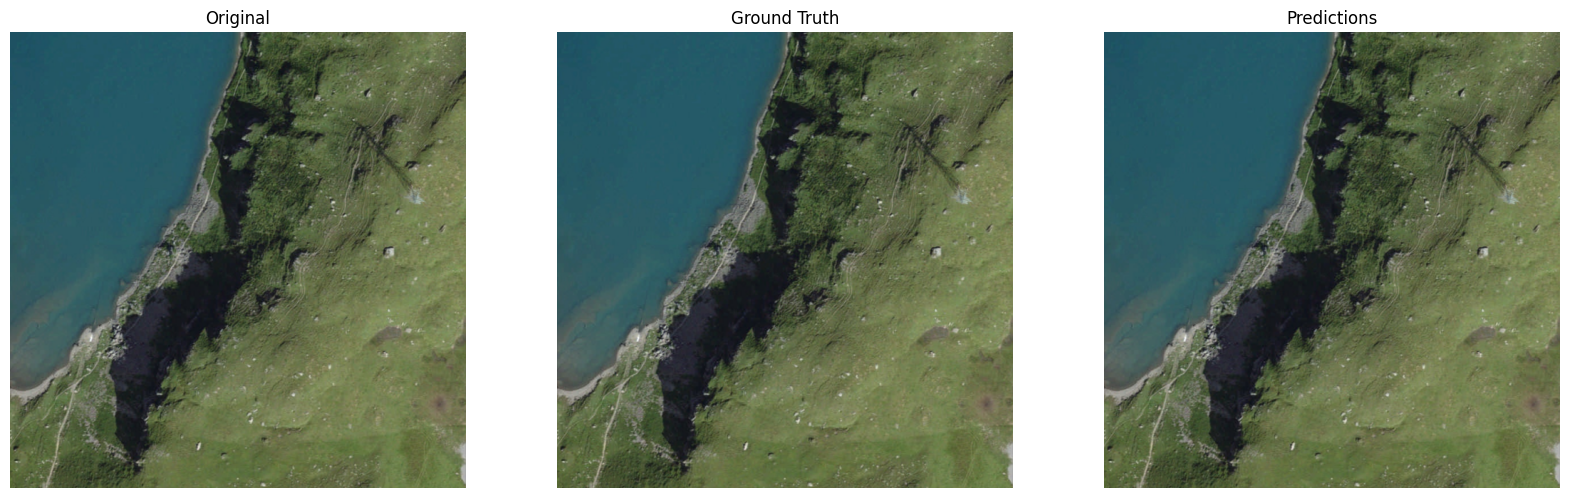

The image below is predicted as: CONTAINING ROCKS with a confidence of 1.0


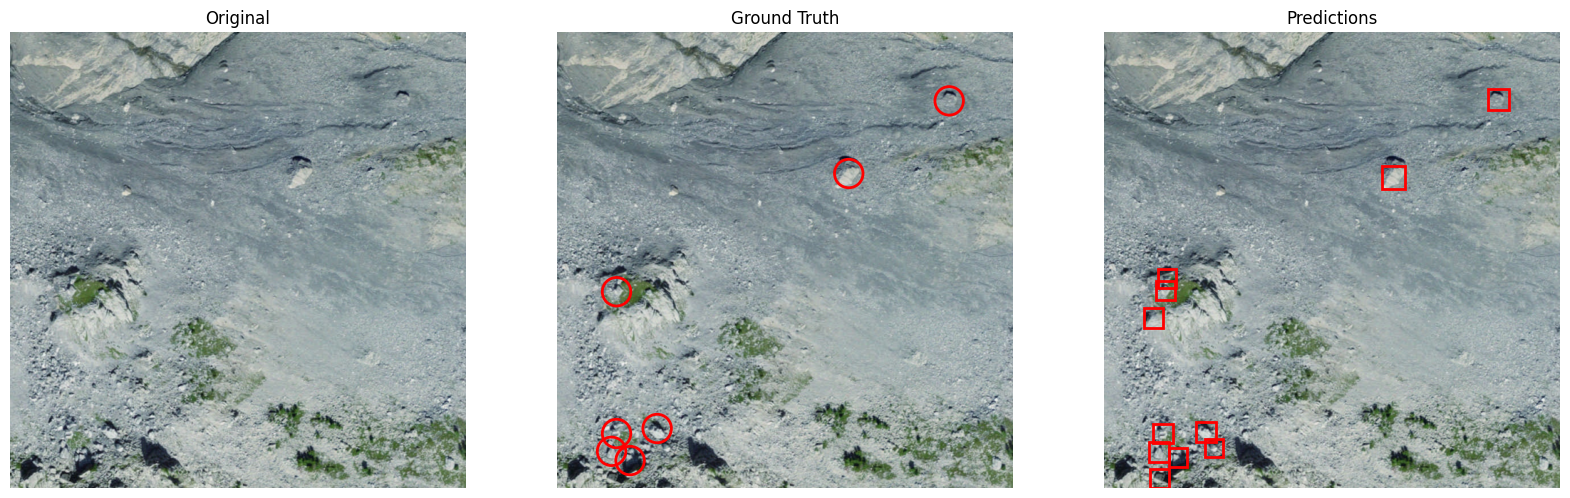

The image below is predicted as: CONTAINING ROCKS with a confidence of 0.9999884366989136


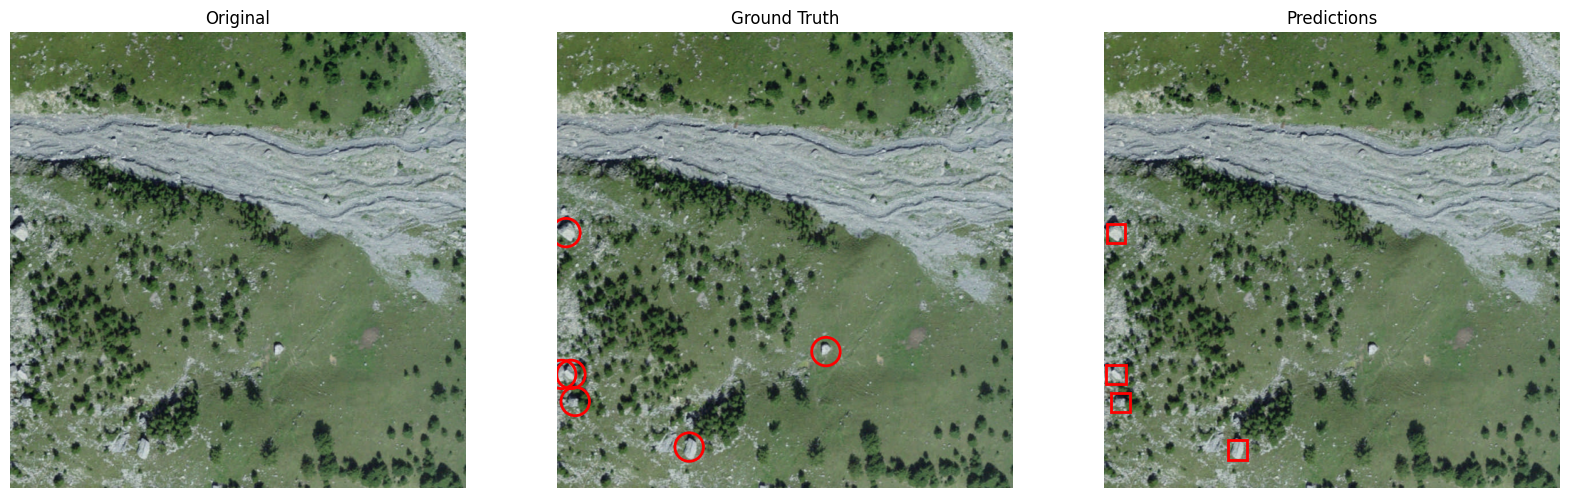

In [6]:
for img, result in zip(imgs, results):
    
    print(f"The image below is predicted as: {'CONTAINING ROCKS' if result[1].top1 == 0 else 'ROCKLESS'} with a confidence of {result[1].top1conf}")

    img_path = os.path.join('.','test', img + '.tif')
    lbl_path = os.path.join('.','test', img + '.txt')

    img = plt.imread(img_path)
    fig, axes = plt.subplots(1, 3, figsize=(20, 10))
    axes[0].imshow(img[:,:,:3])
    axes[1].imshow(img[:,:,:3])
    axes[2].imshow(img[:,:,:3])

    with open(lbl_path, 'r') as f:
        bboxes = f.readlines()
        for box in bboxes:
            x, y = map(float, box.split(' ')[1:3])
            x = int(x * 640)  # Scale x to image dimensions
            y = int(y * 640)  # Scale y to image dimensions
            circ = patches.Circle((x, y), radius=20, linewidth=2, edgecolor='red', facecolor='none')
            axes[1].add_patch(circ)
            
    for box in result[0].boxes.xyxy:
        x_min, y_min, x_max, y_max = box
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='red', facecolor='none')
        axes[2].add_patch(rect)
    
    for ax in axes:
        ax.axis('off')
    axes[0].set_title('Original')
    axes[1].set_title('Ground Truth')
    axes[2].set_title('Predictions')
    plt.show()